In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
%matplotlib inline

In [123]:
location = 'datasets/DC_Properties.csv'
df = pd.read_csv(location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [125]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [126]:
df.drop('Unnamed: 0', axis=1, inplace =True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [127]:
df.drop(['AYB','YR_RMDL', 'YR_RMDL', 'QUALIFIED', 'GBA', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'SQUARE', 'X', 'Y'], axis=1, inplace =True)

In [128]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,EYB,STORIES,SALEDATE,...,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1972,3.0,2003-11-25 00:00:00,...,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3,1,Warm Cool,Y,2.0,11,5,1972,3.0,2000-08-17 00:00:00,...,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1984,3.0,2016-06-21 00:00:00,...,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1984,3.0,2006-07-12 00:00:00,...,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2,1,Warm Cool,Y,1.0,11,3,1985,3.0,NaN,...,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [129]:
df.drop(['USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA'], axis=1, inplace =True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,EYB,STORIES,SALEDATE,...,ROOF,INTWALL,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1972,3.0,2003-11-25 00:00:00,...,Metal- Sms,Hardwood,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3,1,Warm Cool,Y,2.0,11,5,1972,3.0,2000-08-17 00:00:00,...,Built Up,Hardwood,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1984,3.0,2016-06-21 00:00:00,...,Built Up,Hardwood,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1984,3.0,2006-07-12 00:00:00,...,Built Up,Hardwood,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2,1,Warm Cool,Y,1.0,11,3,1985,3.0,NaN,...,Neopren,Hardwood,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [130]:
df.drop(['EYB', 'HEAT', 'EXTWALL', 'INTWALL', 'ROOF'], axis=1, inplace =True)
df

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4,0,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3,1,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,1,...,Very Good,Good,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3,1,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3,1,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2,1,Y,1.0,11,3,3.0,NaN,NaN,1,...,Very Good,Good,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW
5,3,2,Y,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
6,1,0,Y,2.0,5,2,2.0,2011-05-02 00:00:00,NaN,1,...,Above Average,Average,2.0,0,1769 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3,1,Y,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
8,3,1,Y,2.0,7,3,2.0,2018-05-03 00:00:00,1430000.0,4,...,Above Average,Very Good,2.0,1,1727 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
9,1,1,Y,1.0,6,2,2.0,2008-12-05 00:00:00,NaN,1,...,Good Quality,Average,1.0,0,1733 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [131]:
df.head()

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4,0,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3,1,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,1,...,Very Good,Good,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3,1,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3,1,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2,1,Y,1.0,11,3,3.0,NaN,NaN,1,...,Very Good,Good,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [132]:
df['BATHRM']= df['BATHRM'] + (df['HF_BATHRM']/2)
df.head()

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,0,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3.5,1,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,1,...,Very Good,Good,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2.5,1,Y,1.0,11,3,3.0,NaN,NaN,1,...,Very Good,Good,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [133]:
df.drop('HF_BATHRM', axis=1, inplace =True)
df.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,Y,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3.5,Y,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,1,1,...,Very Good,Good,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,Y,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,Y,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2.5,Y,1.0,11,3,3.0,NaN,NaN,1,1,...,Very Good,Good,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [134]:
df.loc[df['AC'] == "Y", 'AC'] =1
df.loc[df['AC'] == "N", 'AC'] =0
df.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
1,3.5,1,2.0,11,5,3.0,2000-08-17 00:00:00,NaN,1,1,...,Very Good,Good,2.0,4,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
4,2.5,1,1.0,11,3,3.0,NaN,NaN,1,1,...,Very Good,Good,1.0,0,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [135]:
df_no_missing =df.dropna()
df_no_missing.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
5,4.0,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,1,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3.5,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [137]:
df = df_no_missing
df.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
5,4.0,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,1,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3.5,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [138]:
df.head(15)

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
5,4.0,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,1,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3.5,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
8,3.5,1,2.0,7,3,2.0,2018-05-03 00:00:00,1430000.0,4,1,...,Above Average,Very Good,2.0,1,1727 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
14,3.5,1,2.0,5,3,2.0,2011-09-30 00:00:00,1325000.0,1,1,...,Above Average,Very Good,2.0,1,1721 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
16,3.5,1,1.0,8,3,2.0,2010-11-04 00:00:00,1240000.0,1,1,...,Above Average,Very Good,1.0,0,1725 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
19,3.5,1,2.0,9,3,2.0,2001-07-23 00:00:00,592250.0,1,1,...,Good Quality,Good,2.0,1,1735 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
20,3.5,1,1.0,14,5,3.0,2016-01-12 00:00:00,33232.0,3,1,...,Very Good,Very Good,1.0,3,1441 Q STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [139]:
df.corr()

,BATHRM,NUM_UNITS,ROOMS,BEDRM,STORIES,PRICE,SALE_NUM,BLDG_NUM,KITCHENS,FIREPLACES,ZIPCODE
BATHRM,1.000000,0.310904,0.628170,0.629000,0.034876,0.537123,0.066790,-0.012140,0.333424,0.409623,-0.058220
NUM_UNITS,0.310904,1.000000,0.536880,0.340677,0.009970,0.000800,-0.005157,-0.001953,0.910879,-0.040020,-0.089653
ROOMS,0.628170,0.536880,1.000000,0.685698,0.025673,0.342153,-0.005738,-0.017559,0.527939,0.266986,-0.023342
BEDRM,0.629000,0.340677,0.685698,1.000000,0.026177,0.358035,0.008756,-0.023884,0.353237,0.281406,-0.040074
STORIES,0.034876,0.009970,0.025673,0.026177,1.000000,0.042279,0.010024,-0.000708,0.011597,0.027801,-0.018972
PRICE,0.537123,0.000800,0.342153,0.358035,0.042279,1.000000,0.183691,0.055435,0.046913,0.488968,-0.161402
SALE_NUM,0.066790,-0.005157,-0.005738,0.008756,0.010024,0.183691,1.000000,-0.005329,0.009798,-0.036916,-0.027546
BLDG_NUM,-0.012140,-0.001953,-0.017559,-0.023884,-0.000708,0.055435,-0.005329,1.000000,-0.002551,-0.011008,-0.007481
KITCHENS,0.333424,0.910879,0.527939,0.353237,0.011597,0.046913,0.009798,-0.002551,1.000000,-0.013560,-0.097584
FIREPLACES,0.409623,-0.040020,0.266986,0.281406,0.027801,0.488968,-0.036916,-0.011008,-0.013560,1.000000,-0.099155


In [140]:
meanprice = df['PRICE'].mean()
stdprice = df['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

newdf = df.copy() #to not mess up the original df
newdf = newdf.drop(newdf[newdf['PRICE'] > toprange].index)
newdf = newdf.drop(newdf[newdf['PRICE'] < botrange].index)

newdf.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3.5,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
8,3.5,1,2.0,7,3,2.0,2018-05-03 00:00:00,1430000.0,4,1,...,Above Average,Very Good,2.0,1,1727 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
14,3.5,1,2.0,5,3,2.0,2011-09-30 00:00:00,1325000.0,1,1,...,Above Average,Very Good,2.0,1,1721 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [141]:
meanprice = df['BEDRM'].mean()
stdprice = df['BEDRM'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

newdf = df.copy() #to not mess up the original df
newdf = newdf.drop(newdf[newdf['BEDRM'] > toprange].index)
newdf = newdf.drop(newdf[newdf['BEDRM'] < botrange].index)

newdf.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
0,4.0,1,2.0,8,4,3.0,2003-11-25 00:00:00,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2,3.5,1,2.0,9,5,3.0,2016-06-21 00:00:00,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
3,3.5,1,2.0,8,5,3.0,2006-07-12 00:00:00,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
5,4.0,1,1.0,10,5,4.0,2010-02-26 00:00:00,1950000.0,1,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
7,3.5,1,2.0,8,4,3.0,2011-09-29 00:00:00,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


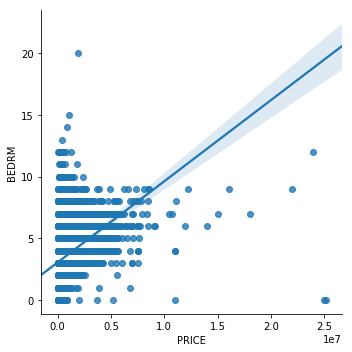

In [119]:
sns.lmplot(x='PRICE', y='BEDRM', data=df)

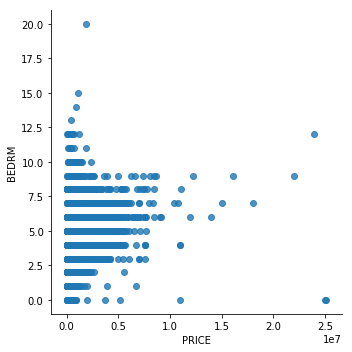

In [120]:
sns.lmplot(x='PRICE', y='BEDRM', data=df,
           fit_reg=False) 

In [121]:
df.set_index(pd.to_datetime(df['SALEDATE']), inplace =True)
df.drop('SALEDATE', axis= 1, inplace =True)
df.head()


KeyError: 'SALEDATE'

In [142]:
df.set_index(pd.to_datetime(df['SALEDATE']), inplace =True)

In [ ]:
sns.lmplot(x='PRICE', y='BEDRM', data=df,
           fit_reg=False) 

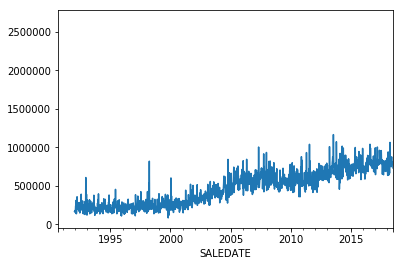

In [154]:
weekly = df.resample('W').mean()
weekly['PRICE'].plot()

In [ ]:
yearly = df.resample('Y').mean()
yearly['PRICE'].plot()

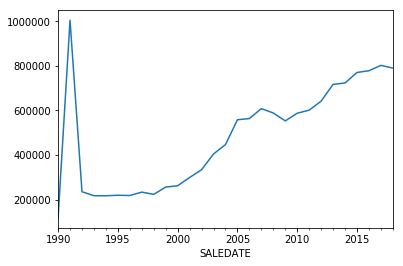

In [151]:
yearly = df.resample('Y').mean()
yearly['PRICE'].plot()

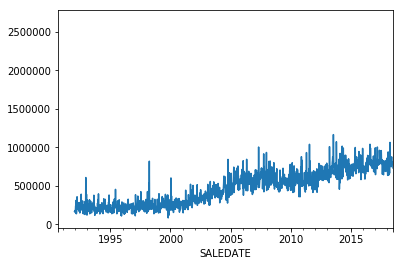

In [155]:
monthly =df.resample('M').mean()
weekly['PRICE'].plot()

In [144]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
location = 'datasets/DC_Properties.csv'
new_df = pd.read_csv(location)

In [87]:
df['SALEDATE'] = new_df['SALEDATE']


In [149]:
df.head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
SALEDATE,,,,,,,,,,,,,,,,,,,,,
2003-11-25,4.0,1,2.0,8,4,3.0,2003-11-25,1095000.0,1,1,...,Very Good,Good,2.0,5,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2016-06-21,3.5,1,2.0,9,5,3.0,2016-06-21,2100000.0,3,1,...,Very Good,Very Good,2.0,4,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2006-07-12,3.5,1,2.0,8,5,3.0,2006-07-12,1602000.0,1,1,...,Very Good,Good,2.0,3,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2010-02-26,4.0,1,1.0,10,5,4.0,2010-02-26,1950000.0,1,1,...,Very Good,Good,1.0,4,1709 S STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW
2011-09-29,3.5,1,2.0,8,4,3.0,2011-09-29,1050000.0,1,1,...,Very Good,Average,2.0,1,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,Ward 2,NW


In [150]:
df[(df['SALEDATE'] <= year_cutoff)].head()

,BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,...,GRADE,CNDTN,KITCHENS,FIREPLACES,FULLADDRESS,CITY,STATE,ZIPCODE,WARD,QUADRANT
SALEDATE,,,,,,,,,,,,,,,,,,,,,
